In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import Sequential
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

c:\Users\Ahmad Awais\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_data_path="E:/preprocessed images/Adaptive histogram dataset/adap hist(3)/preprocessed train data"
val_data_path="E:/preprocessed images/Adaptive histogram dataset/adap hist(3)/preprocessed val data"
test_data_path="E:/preprocessed images/Adaptive histogram dataset/adap hist(3)/preprocessed test data"

In [5]:
train_gen=ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

In [6]:
train_data=train_gen.flow_from_directory(
                                
                                        train_data_path,
                                        class_mode="categorical",
                                        batch_size=32,
                                        color_mode="grayscale",
                                        target_size=(112,112),
                                        shuffle=True,
                                                                        
                                         
                                        )

val_data=val_gen.flow_from_directory(
                                        val_data_path,
                                        class_mode="categorical",
                                        color_mode="grayscale",
                                        batch_size=32,
                                        target_size=(112,112),
                                        shuffle=False
                                        )

test_data=test_gen.flow_from_directory(
                                        test_data_path,
                                        class_mode="categorical",
                                        batch_size=32,
                                        color_mode="grayscale",
                                        target_size=(112,112),
                                        shuffle=False
                                        )

Found 2446 images belonging to 3 classes.
Found 345 images belonging to 3 classes.
Found 721 images belonging to 3 classes.


In [9]:
cnn_3=load_model("E:/saved models/finalize models for project/Model_5_classes/CNN_Model_5_classes.h5")

In [8]:
cnn_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 64)        18496     
                                                        

In [9]:
for layer in cnn_3.layers:
    layer.trainable = False

In [14]:
pretrained_output = cnn_3.layers[-2].output

In [15]:
x = Dense(512, activation='relu')(pretrained_output)
x = Dense(256, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)

In [16]:
cnn_3=Model(inputs=cnn_3.input, outputs=predictions)

In [17]:
cnn_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 112, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                           

In [18]:
for layer in cnn_3.layers:
    print(f"Layer Name: {layer.name}, Trainable: {layer.trainable}")

Layer Name: input_1, Trainable: True
Layer Name: conv2d, Trainable: False
Layer Name: conv2d_1, Trainable: False
Layer Name: conv2d_2, Trainable: False
Layer Name: max_pooling2d, Trainable: False
Layer Name: dropout, Trainable: False
Layer Name: conv2d_3, Trainable: False
Layer Name: average_pooling2d, Trainable: False
Layer Name: dropout_1, Trainable: False
Layer Name: conv2d_4, Trainable: False
Layer Name: average_pooling2d_1, Trainable: False
Layer Name: dropout_2, Trainable: False
Layer Name: flatten, Trainable: False
Layer Name: dense, Trainable: False
Layer Name: dropout_3, Trainable: False
Layer Name: dense_3, Trainable: True
Layer Name: dense_4, Trainable: True
Layer Name: dense_5, Trainable: True


In [19]:
cnn_3.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn_3.fit(train_data, epochs=20, batch_size=32, validation_data=val_data)

Epoch 1/20
77/77 [==============================] - 56s 707ms/step - loss: 0.4538 - accuracy: 0.8066 - val_loss: 0.4571 - val_accuracy: 0.8087
Epoch 2/20
77/77 [==============================] - 46s 596ms/step - loss: 0.3872 - accuracy: 0.8430 - val_loss: 0.4723 - val_accuracy: 0.8145
Epoch 3/20
77/77 [==============================] - 51s 657ms/step - loss: 0.3805 - accuracy: 0.8365 - val_loss: 0.4566 - val_accuracy: 0.8232
Epoch 4/20
77/77 [==============================] - 47s 613ms/step - loss: 0.3863 - accuracy: 0.8328 - val_loss: 0.4661 - val_accuracy: 0.8174
Epoch 5/20
77/77 [==============================] - 47s 612ms/step - loss: 0.3786 - accuracy: 0.8434 - val_loss: 0.4509 - val_accuracy: 0.8261
Epoch 6/20
77/77 [==============================] - 47s 607ms/step - loss: 0.3685 - accuracy: 0.8496 - val_loss: 0.4616 - val_accuracy: 0.8087
Epoch 7/20
77/77 [==============================] - 47s 605ms/step - loss: 0.3756 - accuracy: 0.8479 - val_loss: 0.4561 - val_accuracy: 0.8087

In [21]:
cnn_3.save("E:/saved models/finalize models for project/Model_3_classes/cnn_3_classes.h5")

E:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
cnn_3=load_model("E:/finalize models for project/CNN/Multiclass/cnn_3_classes.h5")

In [8]:
# Load your pre-trained CNN model
CNN = cnn_3

# Create a new model with the modified architecture
feature_extractor = Model(inputs=CNN.input, outputs=CNN.layers[-2].output)

In [9]:
test_deep_features = feature_extractor.predict(test_data)
print(feature_extractor.output_shape)

23/23 [==============================] - 10s 417ms/step
(None, 256)


In [10]:
scaler = MinMaxScaler()
test_normalized_features = scaler.fit_transform(test_deep_features)

In [11]:
N_components = 0.99  

pca = PCA(n_components=N_components)
test_reduced_features = pca.fit_transform(test_normalized_features)

In [12]:
x=test_reduced_features
y=test_data.classes

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
# Create an SVM classifier
svm_classifier = SVC(C=1000,gamma=0.009)


svm_classifier.fit(x_train,y_train)

y_pred = svm_classifier.predict(x_test)

actual_class_labels = ['Stage 2', 'Stage 3','Stage 4']  


report = classification_report(y_test, y_pred, target_names=actual_class_labels)


custom_title = "\n CNN MULTICLASS CLASSIFICATION REPORT\n\n"
report_with_title = custom_title + report


print(report_with_title)


 CNN MULTICLASS CLASSIFICATION REPORT

              precision    recall  f1-score   support

     Stage 2       0.90      0.85      0.87        91
     Stage 3       0.64      0.82      0.72        45
     Stage 4       0.00      0.00      0.00         9

    accuracy                           0.79       145
   macro avg       0.51      0.56      0.53       145
weighted avg       0.76      0.79      0.77       145



23/23 [==============================] - 11s 462ms/step


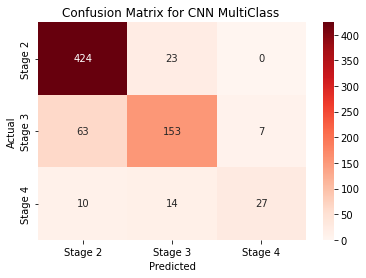

In [15]:
predictions = cnn_3.predict(test_data)

predicted_labels = predictions.argmax(axis=1)

true_labels = test_data.classes

cm = confusion_matrix(true_labels, predicted_labels)
classes = ['Stage 2', 'Stage 3','Stage 4']

plt.figure()
ax = plt.subplot()
ax.set_title('Confusion Matrix for CNN MultiClass ')

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

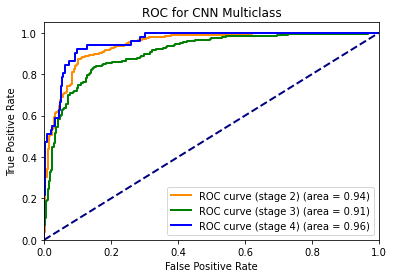

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predicted_probabilities = predictions  
true_labels = test_data.classes

# Calculate ROC curve for class "stage 2"
fpr_stage2, tpr_stage2, _ = roc_curve(true_labels, predicted_probabilities[:, 0], pos_label=0)
roc_auc_stage2 = auc(fpr_stage2, tpr_stage2)

# Calculate ROC curve for class "stage 3"
fpr_stage3, tpr_stage3, _ = roc_curve(true_labels, predicted_probabilities[:, 1], pos_label=1)
roc_auc_stage3 = auc(fpr_stage3, tpr_stage3)

# Calculate ROC curve for class "stage 4"
fpr_stage4, tpr_stage4, _ = roc_curve(true_labels, predicted_probabilities[:, 2], pos_label=2)
roc_auc_stage4 = auc(fpr_stage4, tpr_stage4)

# Plot ROC curves
plt.figure()
plt.plot(fpr_stage2, tpr_stage2, color='darkorange', lw=2, label='ROC curve (stage 2) (area = %0.2f)' % roc_auc_stage2)
plt.plot(fpr_stage3, tpr_stage3, color='green', lw=2, label='ROC curve (stage 3) (area = %0.2f)' % roc_auc_stage3)
plt.plot(fpr_stage4, tpr_stage4, color='blue', lw=2, label='ROC curve (stage 4) (area = %0.2f)' % roc_auc_stage4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for CNN Multiclass')
plt.legend(loc="lower right")
plt.show()